In [62]:
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Load Data

In [4]:
data = fetch_california_housing()

In [6]:
x, y = data.data, data.target

In [7]:
x.shape

(20640, 8)

In [8]:
y.shape

(20640,)

In [9]:
## Train test data split

In [15]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [16]:
x_train.shape

(16512, 8)

In [17]:
y_train.shape

(16512,)

In [18]:
x_test.shape

(4128, 8)

In [19]:
y_test.shape

(4128,)

In [20]:
x_train[0]

array([ 3.25960000e+00,  3.30000000e+01,  5.01765650e+00,  1.00642055e+00,
        2.30000000e+03,  3.69181380e+00,  3.27100000e+01, -1.17030000e+02])

In [21]:
## Standardization using scikit library

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x_train[0]

array([-0.326196  ,  0.34849025, -0.17491646, -0.20836543,  0.76827628,
        0.05137609, -1.3728112 ,  1.27258656])

In [24]:
x_test[0]

array([-1.15508475, -0.28632369, -0.52068576, -0.17174603, -0.03030109,
        0.06740798,  0.1951    ,  0.28534728])

In [25]:
## Define our model

In [26]:
model = models.Sequential()

In [27]:
x_train[0].shape

(8,)

In [29]:
model.add(layers.Input(shape=(8,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
## Compile

In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [38]:
## Fit

In [39]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.1370 - mae: 1.0497
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4736 - mae: 0.4961
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4220 - mae: 0.4594
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3765 - mae: 0.4383
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3700 - mae: 0.4347
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3650 - mae: 0.4289
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3550 - mae: 0.4202
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3459 - mae: 0.4176
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3423 - mae: 0.4118
Epoch 10/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3408 - mae: 0.4124


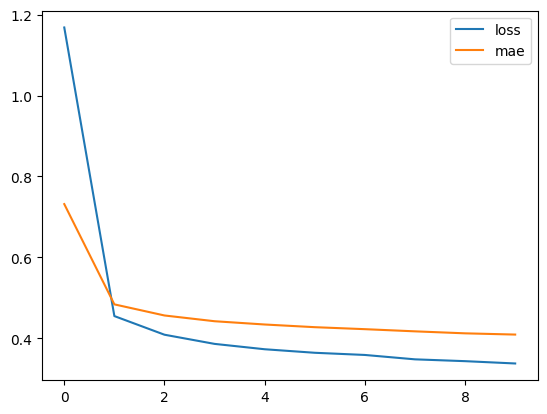

In [64]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.legend()
plt.show()

In [40]:
## Evaluate

In [41]:
loss, accuracy = model.evaluate(x_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3596 - mae: 0.4258


In [42]:
## Predict

In [43]:
sample_input = x_test[0]

In [44]:
sample_input

array([-1.15508475, -0.28632369, -0.52068576, -0.17174603, -0.03030109,
        0.06740798,  0.1951    ,  0.28534728])

In [51]:
si = np.expand_dims(sample_input, axis=0)

In [56]:
si

array([[-1.15508475, -0.28632369, -0.52068576, -0.17174603, -0.03030109,
         0.06740798,  0.1951    ,  0.28534728]])

In [53]:
predicted_price = model.predict(si)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [54]:
predicted_price

array([[0.79041505]], dtype=float32)

In [58]:
predicted_price[0]

array([0.79041505], dtype=float32)

In [59]:
predicted_price[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [60]:
predicted_price[0][0]

np.float32(0.79041505)

In [61]:
predicted_price[0][0] * 1000000

np.float32(790415.06)